# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - 데이터 내의 다른 컬럼을 통해 사망여부(Death_event)를 얼마나 잘 예측할 수  있는 지 알아보자


## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'Sonjoony'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

###  2. 데이터 다운로드 및 압축 해제하기


In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'

In [ ]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


###  3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df

## Step 2. EDA 및 데이터 기초 통계 분석


###  4. 데이터프레임의 각 컬럼 분석하기


In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###  5. 수치형 데이터의 히스토그램 그리기


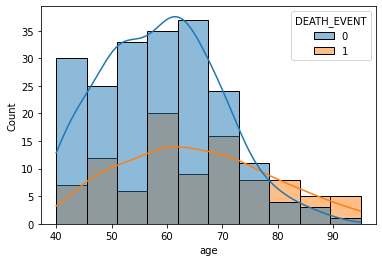

In [ ]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

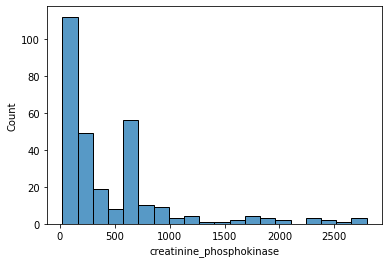

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

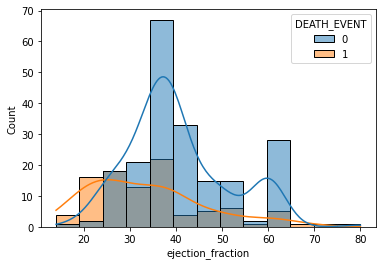

In [ ]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

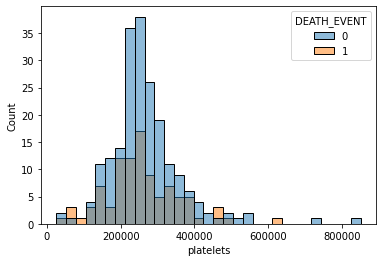

In [ ]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

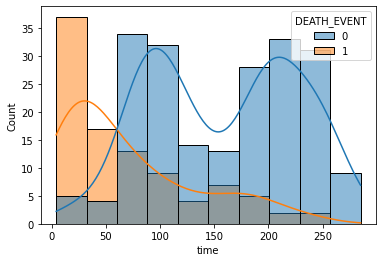

In [ ]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

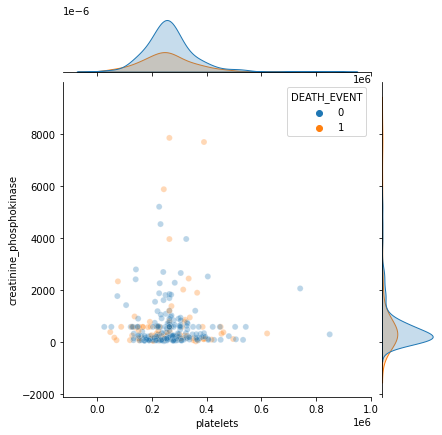

In [ ]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

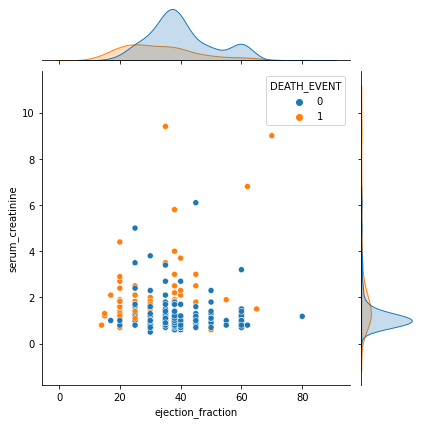

In [ ]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

###  6. Boxplot 계열을 이용하여 범주별 통계 확인하기


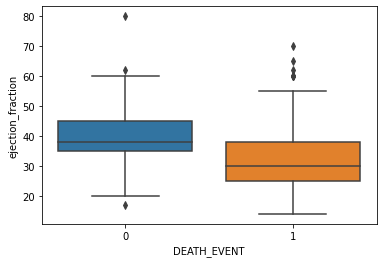

In [ ]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

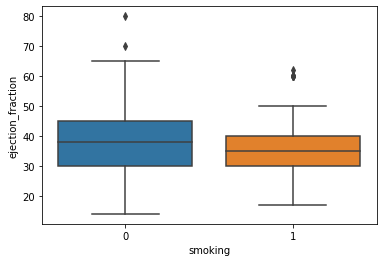

In [ ]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

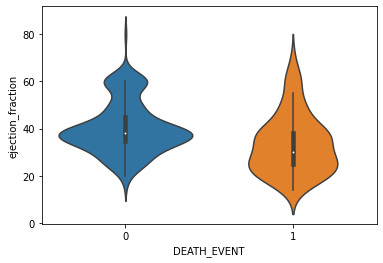

In [ ]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


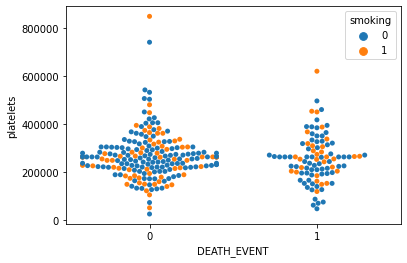

In [ ]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

## Step 3. 모델 학습을 위한 데이터 전처리


###  7. StandardScaler를 이용하여 데이터 전처리하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [ ]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

In [ ]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


###  8. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


###  9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###  10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



###  11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

###  12. 모델 학습 결과 평가하기


In [ ]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        64
           1       0.68      0.58      0.62        26

    accuracy                           0.80        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.79      0.80      0.79        90



###  13. 특징의 중요도 확인하기


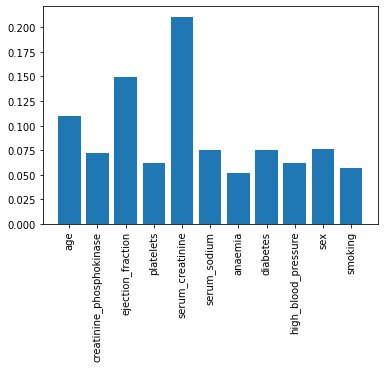

In [ ]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step5 모델 학습 결과 심화 분석하기


###  14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

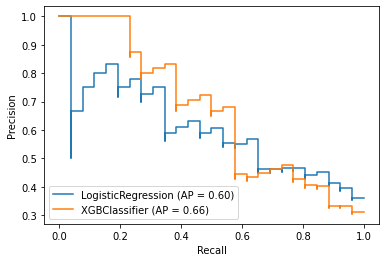

In [ ]:
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

###  15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

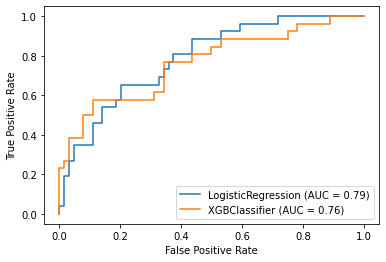

In [ ]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

In [ ]:
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

## 결론

serum_creatinine, ejection_fraction, age (Xgb기준) 순으로 사망여부를 잘 예측한다. f1-score가 0.8 정도로 나쁘지 않게 예측은 하지만 정확한 예측은 어렵다.